# Machine Learning - Andrew Ng ( Python Implementation)

## K-means Clustering

### Loading the data

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [206]:
mat1=loadmat("ex7data2.mat")
X=mat1["X"]

### Finding closest centroids
In the \cluster assignment" phase of the K-means algorithm, the algorithm
assigns every training example x(i) to its closest centroid, given the current
positions of centroids. Speciacally, for every example i we set
$c^{(i)} := j$ that minimizes $\|x^{(i)} - u_j\|^2$

c(i) := j that minimizes jjx(i) 􀀀 j jj2;
where c(i) is the index of the centroid that is closest to x(i), and j is the
position (value) of the j'th centroid. Note that c(i) corresponds to idx(i) in
the starter code.
Your task is to complete the code in findClosestCentroids.m. This
function takes the data matrix X and the locations of all centroids inside
centroids and should output a one-dimensional array idx that holds the
index (a value in f1; :::;Kg, where K is total number of centroids) of the
closest centroid to every training example.
You can implement this using a loop over every training example and
every centroid.


In [207]:
def findClosestCentroids(X,centroids):
    k=centroids.shape[0]
    idx=np.zeros((X.shape[0],1))
    temp=np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(k):
            temp[j]=np.sqrt((X[i][0]-centroids[j][0])**2 + (X[i][1]-centroids[j][1])**2)
        idx[i]=np.argmin(temp)+1
    return idx
            
    

In [208]:
# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx=findClosestCentroids(X,initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


### Computing centroid means
Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that were
assigned to it. Specically, for every centroid k we set


$u_k := \frac{1}{C_k} \Sigma_{i\in C_k}x^{(i)}$

where Ck is the set of examples that are assigned to centroid k with  $u_k vector

In [209]:
def computeMeans(X, idx, K):
    count=np.zeros((K,1))
    centroids = np.zeros((K,X.shape[1]))
    for i in range (X.shape[0]):
        index=int((idx[i]-1)[0])#this will give index no corresponding to cluster i.e valueof(clusterNo.-1)=index for cluster matrix k
        centroids[index,:]+=X[i,:]
        count[index]+=1
    return (centroids/count)

In [210]:
centroids = computeMeans(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Visualizing K-means Clustering

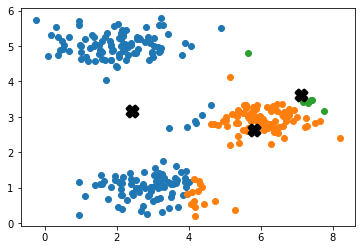

In [211]:
#Testing for if code is work inside the loop
K=3
m=300
for k in range(1,K+1):
    group=(idx==k).reshape(m,1)
    plt.scatter(X[group[:,0],0],X[group[:,0],1],cmap="rgb")
    plt.scatter(centroids[k-1][0],centroids[k-1][1],s=120,marker="X",color="black",linewidths=3)

In [212]:
def plotKmeans(X,K,centroids,idx,num_iters):
    fig,axes=plt.subplots(nrows=num_iters,ncols=1,figsize=(8,80))
    m,n=X.shape[0],X.shape[1]
    for i in range(num_iters):
        for k in range(1,K+1):
            group = (idx==k).reshape(m,1)
            axes[i].scatter(X[group[:,0],0],X[group[:,0],1])
            #Visualize the clusters
        axes[i].scatter(centroids[:,0],centroids[:,1],marker="X",linewidth=3,color="black")
        title = "Iteration Number " + str(i)
        axes[i].set_title(title)
        
        #assign new cluseters after each iteratiion
        idx=findClosestCentroids(X,centroids)
        #assign new centriod
        centroids=computeMeans(X,idx,K)
    plt.tight_layout

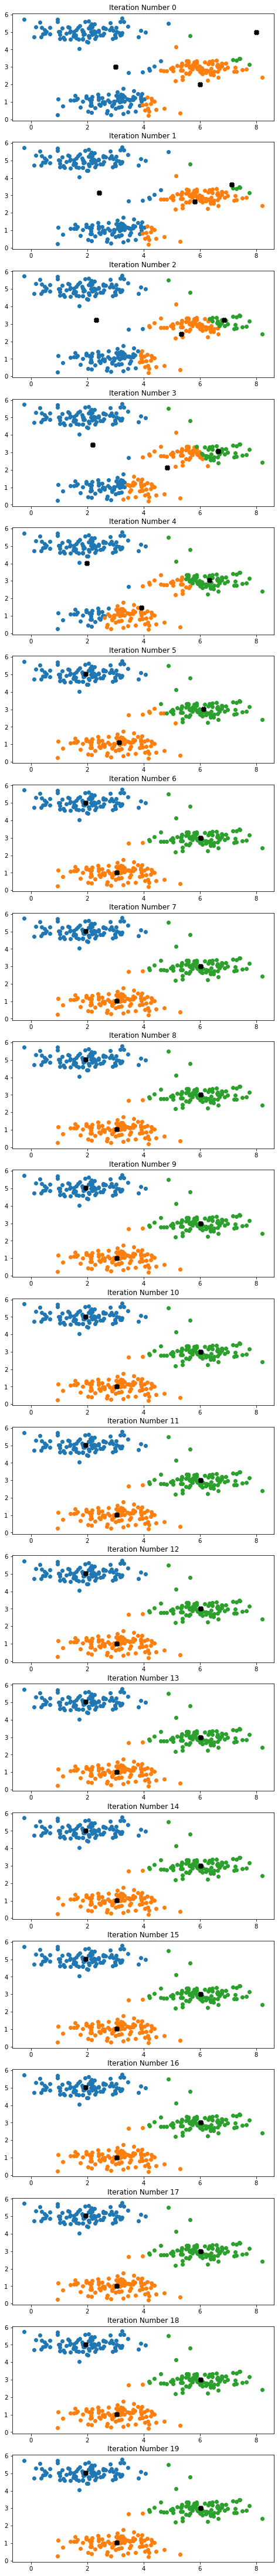

In [213]:
plotKmeans(X,K,initial_centroids,idx,20)

## Random Intialization

In [214]:
def kMeansInitCentroids(X, K):
    m,n=X.shape[0],X.shape[1]
    centriod =np.zeros((K,n))
    for i in range(K):
        centriod[i]=X[np.random.randint(0,m+1),:]
    return centriod

In [215]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

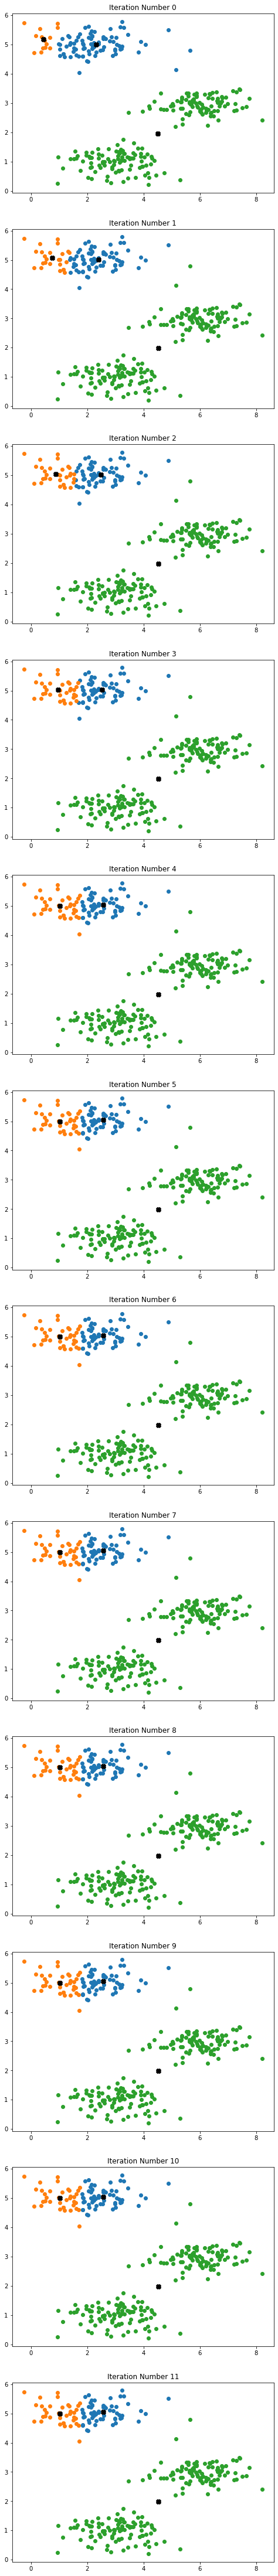

In [216]:
rand_centroids=kMeansInitCentroids(X,K)
idx=findClosestCentroids(X,rand_centroids)
centroids=computeMeans(X,idx,K)
plotKmeans(X,K,centroids,idx,12)

## Elbow method

In [217]:
# def elbow_method(X,K,idx,num_itr):
#     wcss={}
#     sum_in_cluster=0
#     for k in range(K):
#         rand_centroids=kMeansInitCentroids(X,k)
#         idx=findClosestCentroids(X,rand_centroids)
#         centroids=computeMeans(X,idx,k)
#         dist=[]
#         for j in range(1,k+1):
#             group=(idx==j).reshape(m,1)
#             dist.append(np.sqrt((X[group[:,0],0]-centroids[j-1][0])**2+(X[group[:,0],1]-centroids[j-1][1])**2))
#             sum_in_cluster=min(dist)
            
#         wcss[k]=sum_in_cluster
        
#     return wcss
            
       
        
# def elbow_method(X,K,idx,num_itr):
#     distortions = []
#     sum_in_cluster=0
#     for k in range(K):
#         rand_centroids=kMeansInitCentroids(X,k)
#         idx=findClosestCentroids(X,rand_centroids)
#         centroids=computeMeans(X,idx,k)
#         dist=[]
#         for j in range(1,k+1):
#             distortions.append(sum(np.min(cdist(X, kmeanModel.centroids, 'euclidean'), axis=1)) / X.shape[0])
            
        
#     return distortions



# I was actually trying to make graph for elbow method but cdnt succed i will come back and do it
        

## Image Compression with K-means

In [218]:
mat2=loadmat("bird_small.mat")
A=mat2["A"]
# preprocess and reshape the image
X2 = (A/255).reshape(128*128,3)

In [219]:
A.shape

(128, 128, 3)

In [220]:
A[0].shape

(128, 3)

In [221]:
c=np.array([[1,2,3],[2,3,4]])

In [222]:
X2.shape

(16384, 3)

In [223]:
K2=16
initial_centroids2=kMeansInitCentroids(X2,K2)

In [224]:
initial_centroids2.shape

(16, 3)

In [225]:
def runKmeans(X, initial_centroids,num_iters,K):
    idx=findClosestCentroids(X, initial_centroids)# to get initial clusetrs
    
    for i in range(num_iters):
        centroids=computeMeans(X, idx, K)
        idx=findClosestCentroids(X,centroids)
    return centroids,idx
    

In [226]:
centriod2,idx2=runKmeans(X2,initial_centroids2,10,K2)

In [227]:
centriod2[1]

array([0.89571662, 0.52903828, 0.26224323])

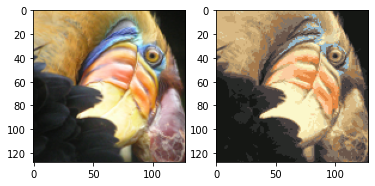

In [228]:
X2_new=X2.copy()
for i in  range(1,K2+1):
    X2_new[(idx2==i).ravel(),:]=centriod2[i-1]
    
    # Reshape the recovered image into proper dimensions
X2_new = X2_new.reshape(128,128,3)

# Display the image

import matplotlib.image as mpimg
fig,axes=plt.subplots(1,2)
axes[0].imshow(X2.reshape(128,128,3))
axes[1].imshow(X2_new)

# Principal Component Analysis

In [229]:
mat3=loadmat("ex7data1.mat")
X3=mat3["X"]


In [230]:
X3.shape

(50, 2)

In [231]:
X3[0]

array([3.38156267, 3.38911268])

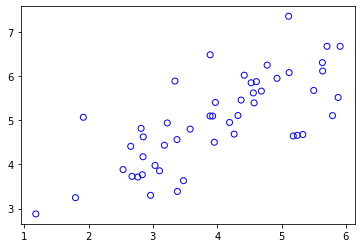

In [232]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

## Feature Normalizartion

In [233]:
def featureNormalize(X):
    m,n=X.shape[0],X.shape[1]
    mean=[]
    sigma=[]
    for i in range(n):
        mean_X=np.mean(X[:,i])
        mean.append(mean_X)
        sigma_X=np.std(X[:,i])
        sigma.append(sigma_X)
        X[:,i]=(X[:,i]-mean_X)/sigma_X
    return X,mean,sigma

#Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.

In [234]:
X3_normalize=featureNormalize(X3)

In [258]:
def pca(X):
    
    m,n=X.shape[0],X.shape[1]
    #Calculate the covariance matrix
    sigma=1/m * X.T @ X
    #run SVD on it to compute the principal components
    U,S,V=svd(sigma)
    return U,S,V
    

In [259]:
from numpy.linalg import svd
X_norm,mu,sigma= featureNormalize(X3)
U,S = pca(X_norm)[:2] # u is eigen vector i.e. principal component vector and S is eigen values i.e. diagonal vector

In [260]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [238]:
S

array([1.73553038, 0.26446962])

In [239]:
mu

[-1.176836406102666e-16, 1.1235457009206583e-15]

In [240]:
[mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]]

([-1.176836406102666e-16, -1.8408079470971712],
 [1.1235457009206583e-15, -1.8408079470971699])

In [241]:
[mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]]

([-1.176836406102666e-16, -0.28051239646247145],
 [1.1235457009206583e-15, 0.28051239646247245])

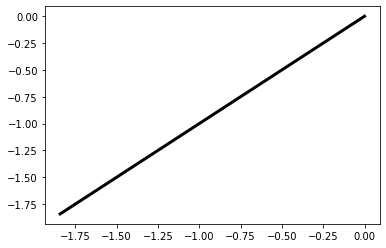

In [242]:
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)

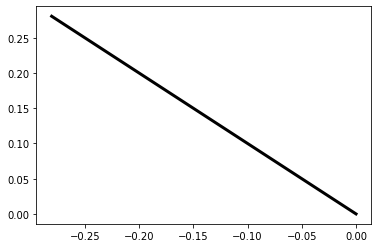

In [243]:
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

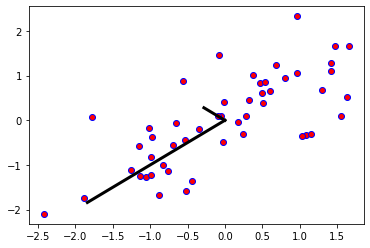

In [244]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="red",edgecolors="blue")
#marker O with circle color with red and circle permiter color blue
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

In [245]:
print("Top eigenvector U(:,0) =:",U[:,0])

Top eigenvector U(:,0) =: [-0.70710678 -0.70710678]


### Dimensionality reduction with PCA

In [246]:
#To reduce the dimension of the dataset, we project the data onto the principal components (eigenvectors) found.
# in projectData.m. Specifically, you are
# given a dataset X, the principal components U, and the desired number of
# dimensions to reduce to K. You should project each example in X onto the
# top K components in U. Note that the top K components in U are given by
# the first K columns of U, that is U reduce = U(:, 1:K).

def projectData(X,U,K):
    m=X.shape[0]
    U_reduced=U[:,:K]
    Z=np.zeros((m,K))
    for i in range(m):
        for j in range(K):
            Z[i,j]=X[i,:] @ U_reduced[:,j]
    return Z
        

In [247]:
# Project the data onto K=1 dimension
K=1
Z=projectData(X3,U,K)


In [248]:
Z.shape

(50, 1)

In [249]:
U[:,]

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [250]:
print("Projection of first point",Z[0][0])

Projection of first point 1.4963126084578526


### Reconstructing an approximation of the data

In [251]:
def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[0]
    X_recovered=np.zeros((m,n))
    U_reduced=U[:,:K]
    for i in range(m):
            X_recovered[i,:]=Z[i,:] @ U_reduced.T
    return X_recovered
            

In [252]:
X_recovered=recoverData(Z,U,K)

In [253]:
print("Approximation of the first example:",X_recovered[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


## Visualizing the projections

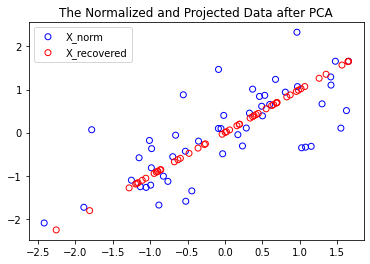

In [254]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",facecolors="None",edgecolors="blue",label="X_norm")
plt.scatter(X_recovered[:,0],X_recovered[:,1],marker="o",facecolors="None",edgecolors="red",label="X_recovered")
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

## Face Image Dataset

In [255]:
mat4 = loadmat("ex7faces.mat")
X4 = mat4["X"]

In [256]:
X41=X4.reshape

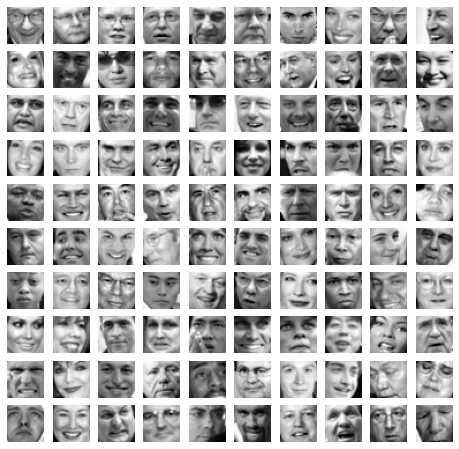

In [257]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

### PCA on faces

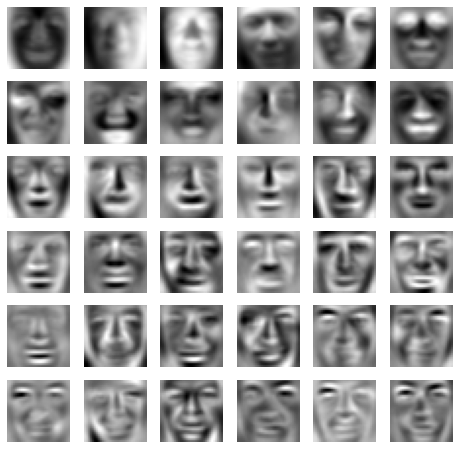

In [267]:
X4_norm=featureNormalize(X4)[0]
#Run PCA
U2,S2,V2=pca(X4_norm)
#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T

fig, ax = plt.subplots(nrows=6,ncols=6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/6),j].axis("off")

In [269]:
K2 = 100
Z2 = projectData(X4_norm, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


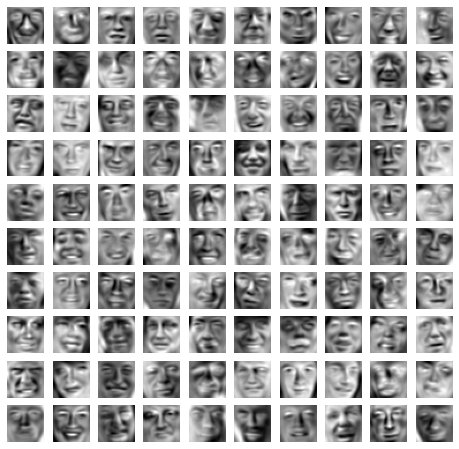

In [271]:
# Data reconstruction
X_recoverd2  = recoverData(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_recoverd2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")